In [29]:
import os
import pickle
import numpy as np
np.random.seed(42)
import pandas as pd
import keras
import seaborn as sn
from keras.models import Model, Sequential
from keras.layers import Embedding, Dense, Dropout, Input, Concatenate, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from sklearn.model_selection import train_test_split as splt
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [24]:
dfx = pd.read_excel("Data/Milano_Cleaned_wSCORE.xlsx")

In [3]:
# Thresholds are 0 - 0.01, 0.01 - 0.02, 0.02 - 0.05, 0.05 - 1
y = dfx["SCORE"].values/100
y_cat = np.zeros((y.shape[0], 4))
for i, val in enumerate(y):
    if(val < 0.01):
        y_cat[i][0] = 1
    elif(val < 0.02):
        y_cat[i][1] = 1
    elif(val < 0.05):
        y_cat[i][2] = 1
    else:
        y_cat[i][3] = 1

In [25]:
dfx = dfx.select_dtypes(exclude=['object', 'datetime64'])
dfx = dfx.drop(labels = ['SCORE', 'smoking', 'smoking_recod', 'LDL_calc', 'glucose', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1) 
dfx = dfx.fillna(-1)
dfx = dfx.drop([col for col in dfx.columns if "date" in col], axis = 1)
dfx = dfx[dfx.columns[dfx.min()>-1]]
dfx = dfx[dfx.columns[dfx.max()>0]]
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 63 columns):
subject_id                        5780 non-null int64
fibers_a                          5780 non-null int64
NS_Drugs                          5780 non-null int64
IMA                               5780 non-null int64
HDL                               5780 non-null int64
silent_ischaemia                  5780 non-null int64
hepatopathies_YN                  5780 non-null int64
remote_bypass_to                  5780 non-null int64
Remote_PTCA_to                    5780 non-null int64
extremities                       5780 non-null int64
Remote_TIA_to                     5780 non-null int64
age                               5780 non-null int64
remote_peripheral_arteriopathy    5780 non-null int64
antihypertensive_to               5780 non-null int64
COPD                              5780 non-null int64
Profile_bypass                    5780 non-null int64
respiratory_system           

In [26]:
X = dfx.values
print(X.shape)

(5780, 63)


In [30]:
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape = (X.shape[1],)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
X_tr, X_ts, y_tr, y_ts = splt(X, y_cat, test_size=0.25, random_state=42)

In [32]:
es = EarlyStopping(patience = 20, restore_best_weights = True)
history = model.fit(x=X_tr, y=y_tr, validation_data=(X_ts, y_ts), epochs=500, callbacks = [es], class_weight = {0: 1, 1: 1, 2: 1, 3: 1})

Train on 4335 samples, validate on 1445 samples
Epoch 1/500
4335/4335 [==============================] - 1s 123us/step - loss: 1.4423 - acc: 0.2593 - val_loss: 1.3556 - val_acc: 0.3080
Epoch 2/500
4335/4335 [==============================] - 0s 30us/step - loss: 1.3876 - acc: 0.2824 - val_loss: 1.3541 - val_acc: 0.2879
Epoch 3/500
4335/4335 [==============================] - 0s 30us/step - loss: 1.3814 - acc: 0.2819 - val_loss: 1.3523 - val_acc: 0.3163
Epoch 4/500
4335/4335 [==============================] - 0s 29us/step - loss: 1.3737 - acc: 0.2860 - val_loss: 1.3496 - val_acc: 0.4028
Epoch 5/500
4335/4335 [==============================] - 0s 31us/step - loss: 1.3634 - acc: 0.3040 - val_loss: 1.3400 - val_acc: 0.3723
Epoch 6/500
4335/4335 [==============================] - 0s 30us/step - loss: 1.3609 - acc: 0.3246 - val_loss: 1.3323 - val_acc: 0.4353
Epoch 7/500
4335/4335 [==============================] - 0s 30us/step - loss: 1.3469 - acc: 0.3398 - val_loss: 1.3074 - val_acc: 0.4457

4335/4335 [==============================] - 0s 30us/step - loss: 0.8894 - acc: 0.6076 - val_loss: 0.7737 - val_acc: 0.6471
Epoch 61/500
4335/4335 [==============================] - 0s 30us/step - loss: 0.8898 - acc: 0.6053 - val_loss: 0.7755 - val_acc: 0.6360
Epoch 62/500
4335/4335 [==============================] - 0s 31us/step - loss: 0.8643 - acc: 0.6108 - val_loss: 0.7637 - val_acc: 0.6651
Epoch 63/500
4335/4335 [==============================] - 0s 30us/step - loss: 0.8860 - acc: 0.6032 - val_loss: 0.7702 - val_acc: 0.6976
Epoch 64/500
4335/4335 [==============================] - 0s 29us/step - loss: 0.8666 - acc: 0.6189 - val_loss: 0.7605 - val_acc: 0.6740
Epoch 65/500
4335/4335 [==============================] - 0s 29us/step - loss: 0.8624 - acc: 0.6219 - val_loss: 0.8143 - val_acc: 0.6291
Epoch 66/500
4335/4335 [==============================] - 0s 29us/step - loss: 0.8588 - acc: 0.6175 - val_loss: 0.7578 - val_acc: 0.6768
Epoch 67/500
4335/4335 [==============================

Epoch 120/500
4335/4335 [==============================] - 0s 29us/step - loss: 0.8150 - acc: 0.6247 - val_loss: 0.7052 - val_acc: 0.6803
Epoch 121/500
4335/4335 [==============================] - 0s 29us/step - loss: 0.8074 - acc: 0.6378 - val_loss: 0.7356 - val_acc: 0.6851
Epoch 122/500
4335/4335 [==============================] - 0s 29us/step - loss: 0.8107 - acc: 0.6330 - val_loss: 0.7495 - val_acc: 0.6796
Epoch 123/500
4335/4335 [==============================] - 0s 29us/step - loss: 0.8095 - acc: 0.6464 - val_loss: 0.7069 - val_acc: 0.6913
Epoch 124/500
4335/4335 [==============================] - 0s 30us/step - loss: 0.8282 - acc: 0.6311 - val_loss: 0.7129 - val_acc: 0.6858
Epoch 125/500
4335/4335 [==============================] - 0s 32us/step - loss: 0.8141 - acc: 0.6298 - val_loss: 0.7104 - val_acc: 0.6941
Epoch 126/500
4335/4335 [==============================] - 0s 30us/step - loss: 0.8093 - acc: 0.6424 - val_loss: 0.6938 - val_acc: 0.6893
Epoch 127/500
4335/4335 [=========

In [33]:
def plot_history(history, filename, filename2):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc="lower right")
    plt.savefig(filename)
    plt.ylim(0, 1.5)
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc="lower right")
    plt.ylim(0,1)
    plt.savefig(filename2)
    plt.show()

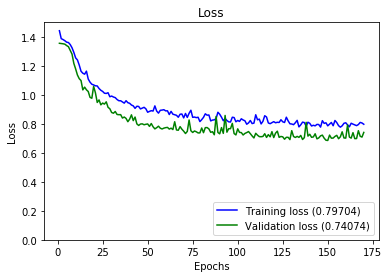

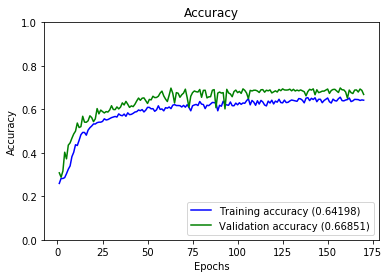

In [34]:
plot_history(history, "Graphs/BNE_2_LOSS.png", "Graphs/BNE_2_ACC.png")

In [38]:
y_ts_pred = model.predict(X_ts)
cmatrix = np.zeros((4,4))
for i,y_our in enumerate(y_ts_pred):
    cmatrix[np.argmax(y_our)][np.argmax(y_ts[i])] += 1

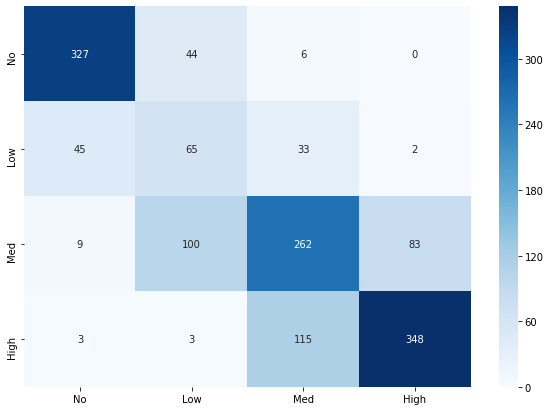

In [39]:
df_cm = pd.DataFrame(cmatrix, index = ["No", "Low", "Med", "High"], columns = ["No", "Low", "Med", "High"])
plt.figure(figsize = (10,7))
snheatmap = sn.heatmap(df_cm, annot=True,  fmt='g', cmap="Blues")

In [40]:
snheatmap.get_figure().savefig("BNE_2_CONFUSION_MATRIX.png")